### Summery
<pre>
Author           : Anjana Tiha
Project Name     : Detection of Pneumonia from Chest X-Ray Images using Convolutional Neural Network, 
                   and Transfer Learning.
Description      : 1. Detected Pneumonia from Chest X-Ray images by retraining pretrained model “InceptionV3” 
                      with 5856 images of X-ray (1.15GB).
                   2. For retraining removed output layers, freezed first few layers and Fine-tuned model for 
                      two new label classes (Pneumonia and Normal).
                   3. Attained testing accuracy 83.44% and loss 0.42.
Method           : 
Tools/Library    : Python, Keras, PyTorch, TensorFlow
Version History  : 1.0.0.0
Current Version  : 1.0.0.0
Last Update      : 11.24.2018
Comments         : Please use Anaconda editor for convenience.
</pre>

#### Code
<pre>
GitHub Link      : <a href=https://github.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitHub)</a>
GitLab Link      : <a href=https://gitlab.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitLab)</a>
Portfolio        : <a href=https://anjanatiha.wixsite.com/website>Anjana Tiha's Portfolio</a>
</pre>

#### Dataset
<pre>
Dataset Name     : Chest X-Ray Images (Pneumonia)
Dataset Link     : <a href=https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia>Chest X-Ray Images (Pneumonia) Dataset (Kaggle)</a>
                 : <a href=https://data.mendeley.com/datasets/rscbjbr9sj/2>Chest X-Ray Images (Pneumonia) Dataset (Original Dataset)</a>
Original Paper   : <a href=https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5>Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning</a>
                   (Daniel S. Kermany, Michael Goldbaum, Wenjia Cai, M. Anthony Lewis, Huimin Xia, Kang Zhang)
                   https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
</pre>

#### Library/Tools Version
- Python - v3.6.7
- argparse
- random
- numpy
- shutil
- gc
- re
- Keras - 2.2.4
- Keras-preprocessing - v1.0.5
- TensorFlow - 1.12
- PIL/Pillow - 5.1.0
- Matplotlib - 2.2.2
- scikit-learn - 0.19.1
- mlxtend - 0.14.0

#### Commands / Running Instruction
<pre>
tensorboard --logdir=logs
%config IPCompleter.greedy=True
</pre>

<pre>
<b>Dataset Details</b>
Dataset Name           : Chest X-Ray Images (Pneumonia)
Number of Class        : 2
Number/Size of Images  : Total      : 5856 (1.15 Gigabyte (GB))
                         Training   : 5216 (1.07 Gigabyte (GB))
                         Validation : 320  (42.8 Megabyte (MB))
                         Testing    : 320  (35.4 Megabyte (MB))

<b>Model Parameters</b>
Machine Learning Library: Keras
Base Model              : InceptionV3
Optimizers              : Adam
Loss Function           : categorical_crossentropy

<b>Training Parameters</b>
Batch Size              : 64
Number of Epochs        : 50
Training Time           : 3 Hours

<b>Output (Prediction/ Recognition Accuracy)</b>
Metrics (Accuracy)     : Testing: 83.44%
Metrics (Loss)         : Testing: 0.42
</pre>

In [1]:
from __future__ import print_function

import argparse
import sys
import os

import random

import time

import numpy as np

import shutil

import gc

import re

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

import tensorflow as tf

from IPython.display import display
from PIL import Image

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

C:\Users\Andromeda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# make or reset directory
def mk_reset_dir(directory):
    if os.path.exists(directory):
        try:
            shutil.rmtree(directory)
            os.mkdir(directory)
        except:
            print("error:", directory)
    else:
        try:
            os.mkdir(directory)
        except:
            print("error create:", directory)
            

def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

In [3]:
# setting data path data seperated by class name
training_dir = r"data/input/train"
testing_dir = r"data/input/test"
validation_dir = r"data/input/val"

# setting output directory
model_dir =  r"data/output/models/"
log_dir = r"data/output/logs"

In [4]:
# model_dir

In [5]:
# mk_reset_dir(model_dir)
# mk_reset_dir(log_dir)

In [6]:
# setting training parameters
norm = 255.0
rescale=1./norm
shear_range=0.2
zoom_range=0.2
horizontal_flip=True

# setting train, test, validation parameters
target_size=(224, 224)
# batch_size=32
batch_size=64
class_mode='categorical'

loss='categorical_crossentropy'
metrics=['accuracy']

epochs = 50
verbose = 1

In [7]:
model_file = model_dir+"{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"
# model_file = "weights-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5"
model_file

'data/output/models/{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5'

In [8]:
# data generator for training
train_datagen = ImageDataGenerator(
        rescale=rescale,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip)

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode)

# data generator for validation
validation_datagen = ImageDataGenerator(rescale=rescale)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode)

# data generator for testing
test_datagen = ImageDataGenerator(rescale=rescale)
test_generator = test_datagen.flow_from_directory(
        testing_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode)

Found 5216 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [18]:
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras import optimizers

# importing inception model
base_model = InceptionV3(weights='imagenet', include_top=False)

# setting model layers specially output layer with class number
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

#loading model
model = Model(inputs=base_model.input, outputs=predictions)


#print layers of inception model
# for i, layer in enumerate(base_model.layers):
#     print(i, layer.name)
    
    
# set all laeyrs as untrainable
for layer in base_model.layers:
    layer.trainable = False
    
# train the top inception layers 
# freeze first 249 layers
# unfreeze the rest
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True
    
# set optimizer
# sgd = optimizers.Adam()
# sgd = optimizers.Adam(lr=0.001)
sgd = optimizers.Adam(lr=0.0001)
# sgd = optimizers.SGD()
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = optimizer=SGD(lr=0.0001, momentum=0.9)

# compile model with optimizer and loss
model.compile(sgd, loss=loss, metrics=metrics)

In [19]:
checkpoint = keras.callbacks.ModelCheckpoint(model_file, monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)


early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None)
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)

tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)
# tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, batch_size=32, write_graph=True, write_grads=False, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)

tensorboard.set_model(model) 

# callbacks_list = [checkpoint, tensorboard, early_stopping]
callbacks_list = [checkpoint, tensorboard]

In [12]:
# train inception model
# fine-tuning the top layers
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch = len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks_list)

Epoch 1/50
82/82 [==============================] - 204s 2s/step - loss: 0.1958 - acc: 0.9179 - val_loss: 1.9855 - val_acc: 0.6219
Epoch 2/50
82/82 [==============================] - 156s 2s/step - loss: 0.1174 - acc: 0.9516 - val_loss: 1.6035 - val_acc: 0.6281
Epoch 3/50
82/82 [==============================] - 162s 2s/step - loss: 0.0914 - acc: 0.9680 - val_loss: 0.4649 - val_acc: 0.8031
Epoch 4/50
82/82 [==============================] - 168s 2s/step - loss: 0.0815 - acc: 0.9701 - val_loss: 1.0920 - val_acc: 0.6625
Epoch 5/50
82/82 [==============================] - 199s 2s/step - loss: 0.0745 - acc: 0.9724 - val_loss: 1.1715 - val_acc: 0.6781
Epoch 6/50
82/82 [==============================] - 158s 2s/step - loss: 0.0700 - acc: 0.9758 - val_loss: 0.9485 - val_acc: 0.7281
Epoch 7/50
82/82 [==============================] - 138s 2s/step - loss: 0.0568 - acc: 0.9790 - val_loss: 1.1787 - val_acc: 0.6781
Epoch 8/50
82/82 [==============================] - 131s 2s/step - loss: 0.0498 - a

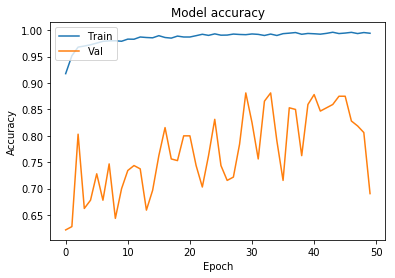

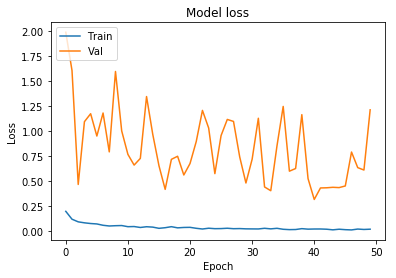

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
#Retraining

In [ ]:
# setting retraining from old model
model_path = "data/output/models/"+"46-val_acc-0.88-val_loss-0.45.hdf5"
# model_path = model_+"\\data\\outputs\\models\\"+"modelsweights-03-val_acc-0.89-val_loss-0.28.hdf5"
epochs=15
verbose=1

model = keras.models.load_model(model_path)

# retrain by loading last good model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks_list)

In [31]:
# testing model

details = False
best_accuracy = 0
best_loss = 0

lowest_accuracy = 100
lowest_loss = 1000000

models_path = "data\\output\\models\\"

best_model_acc = ""
best_model_loss = ""

models_arr = []
accuracy_arr = []
loss_arr = []

model_files = os.listdir(models_path)

i=0
for model_file in model_files:
    model_path = models_path+"\\"+model_file
    try:
        del model
    except:
        pass
    tf.reset_default_graph()
    K.clear_session()
    gc.collect()
    
    model = keras.models.load_model(model_path)
    
    result = model.evaluate_generator(generator=test_generator, steps=len(test_generator))
    
    accuracy = result[1]*100
    loss = result[0]
    
    accuracy_arr.append(accuracy)
    loss_arr.append(loss)
    models_arr.append(model_path)
    
    if accuracy>best_accuracy:
        best_accuracy = accuracy
        best_loss = loss
        best_model_acc=model_path
        
    if loss<lowest_loss:
        lowest_accuracy = accuracy
        lowest_loss = loss
        best_model_loss=model_path
        
    if details:
        print("%s%s"%("Model No: ", i))
        print("%s%s"%("Model File Path: ", model_file))
        print("*"*80)
        print("%s%.2f%s"% ("Current Accuracy: ", accuracy, "%"))
        print("%s%.2f"% ("Current Loss: ", loss))

        print("-"*80)
        print("-"*80)
        
        print("%s%.2f%s"% ("Best Test Accuracy (Accuracy wise):", best_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss (Accuracy wise): ", best_loss))

        print("-"*80)

        print("%s%.2f%s"% ("Best Test Accuracy (Loss wise): ", lowest_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss (Loss wise): ", lowest_loss))

    elif i%10==0:
        print("%s%s"%("Model No: ", i))
        print("%s%s"%("Model File Path: ", model_file))
        print("*"*80)
        
        print("%s%.2f%s"% ("Best Test Accuracy: ", best_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss: ", best_loss))

        print("-"*80)

        print("%s%.2f%s"% ("Best Test Accuracy (Loss wise): ", lowest_accuracy, "%"))
        print("%s%.2f"% ("Best Test Loss (Loss wise): ", lowest_loss))
    
    i+=1

Model No: 0
Model File Path: 01-val_acc-0.62-val_loss-1.99.hdf5
********************************************************************************
Best Test Accuracy: 62.19%
Best Test Loss: 2.06
--------------------------------------------------------------------------------
Best Test Accuracy (Loss wise): 62.19%
Best Test Loss (Loss wise): 2.06
Model No: 10
Model File Path: 11-val_acc-0.73-val_loss-0.77.hdf5
********************************************************************************
Best Test Accuracy: 80.94%
Best Test Loss: 0.60
--------------------------------------------------------------------------------
Best Test Accuracy (Loss wise): 79.06%
Best Test Loss (Loss wise): 0.44
Model No: 20
Model File Path: 21-val_acc-0.80-val_loss-0.67.hdf5
********************************************************************************
Best Test Accuracy: 83.75%
Best Test Loss: 0.42
--------------------------------------------------------------------------------
Best Test Accuracy (Loss wise): 

In [32]:
print("-"*17,"Summary of Model Performance on Test Dataset", "-"*17)

print("%s%s"% ("Best Model Path (Accuracy): ", best_model_acc))
print("%s%.2f%s"% ("Best Test Accuracy: ", best_accuracy, "%"))
print("%s%.2f"% ("Best Test Loss: ", best_loss))

print("-"*100)
print("-"*100)

print("%s%s"% ("Best Model Path (Loss): ", best_model_loss))
print("%s%.2f%s"% ("Best Test Accuracy: ", lowest_accuracy, "%"))
print("%s%.2f"% ("Best Test Loss: ", lowest_loss))

----------------- Summary of Model Performance on Test Dataset -----------------
Best Model Path (Accuracy): data\output\models\\17-val_acc-0.82-val_loss-0.42.hdf5
Best Test Accuracy: 83.75%
Best Test Loss: 0.42
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Best Model Path (Loss): data\output\models\\17-val_acc-0.82-val_loss-0.42.hdf5
Best Test Accuracy: 83.75%
Best Test Loss: 0.42


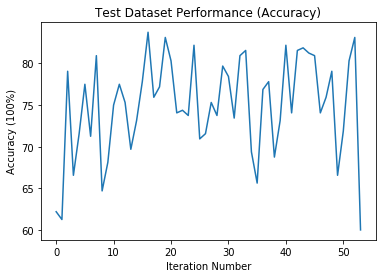

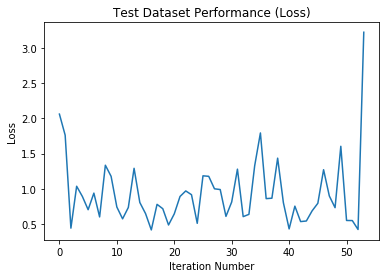

In [47]:
x_axis_arr = np.arange(len(accuracy_arr))
plt.title("Test Dataset Performance (Accuracy)")
plt.plot(x_axis_arr, accuracy_arr)
plt.xlabel("Iteration Number")
plt.ylabel("Accuracy (100%)")
plt.show()

x_axis_arr = np.arange(len(loss_arr))
plt.title("Test Dataset Performance (Loss)")
plt.plot(x_axis_arr, loss_arr)
plt.xlabel("Iteration Number")
plt.ylabel("Loss")
plt.show()

In [9]:
model_path = "data/output/models/"+"17-val_acc-0.82-val_loss-0.42.hdf5"

In [54]:
# testing model
model = keras.models.load_model(model_path)
result = model.evaluate_generator(generator=test_generator, steps=len(test_generator))
print("-"*17,"Summary of Best Model Performance on Test Dataset", "-"*17)
print("%s%.2f%s"% ("Test Accuracy: ", result[1]*100, "%"))
print("%s%.2f"% ("Test Loss: ", result[0]))

----------------- Summary of Best Model Performance on Test Dataset -----------------
Test Accuracy: 80.31%
Test Loss: 0.49


In [10]:
# testing model
model = keras.models.load_model(model_path)
preds = model.predict_generator(test_generator, steps=len(test_generator))
y_classes = preds.argmax(axis=-1)

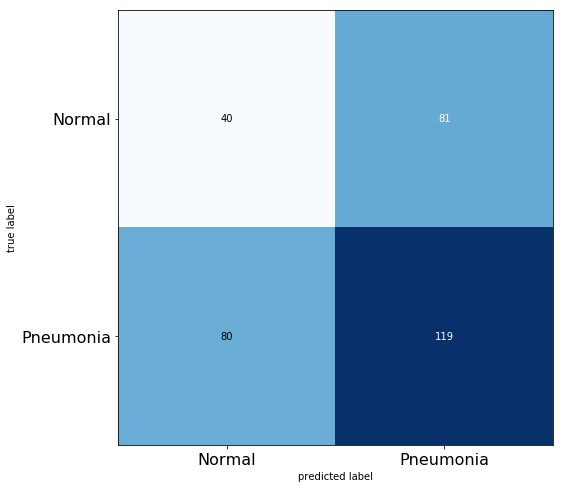

In [11]:
target_names = ['Normal', 'Pneumonia']

CM = confusion_matrix(test_generator.classes, y_classes)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [12]:
print(classification_report(test_generator.classes, y_classes, target_names=target_names))

             precision    recall  f1-score   support

     Normal       0.33      0.33      0.33       121
  Pneumonia       0.59      0.60      0.60       199

avg / total       0.50      0.50      0.50       320



In [13]:
# Calculate Precision and Recall
tn, fp, fn, tp = CM.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.60
Precision of the model is 0.59


In [14]:
label_map = (test_generator.class_indices)
label_map_rev = {v: name_correct(k) for k,v in label_map.items()}
num_batch_t = len(test_generator)
print(label_map)
print(label_map_rev)

{'NORMAL': 0, 'PNEUMONIA': 1}
{0: 'Normal', 1: 'Pneumonia'}


In [15]:
num = random.randint(0, num_batch_t-1)
y_img_batch, y_class_batch = test_generator[num] 
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print("Selected Batch No: %d\nBatch Size: %d"%(num, len(y_pred)))
print("Accuracy : ", sum(y_pred==y_true)/batch_size*100, "%")

y_true_labels = [label_map_rev[c] for c in y_true]
y_pred_labels = [label_map_rev[c] for c in y_pred]
batch_size_t = len(y_true_labels)

Selected Batch No: 1
Batch Size: 64
Accuracy :  79.6875 %


In [19]:
figure_directory = "data/output/figures"
image_file_name = figure_directory+"/result"

dpi=100


cols = 4
rows= batch_size_t/cols
if batch_size_t%cols==0:
    rows = int(batch_size_t/cols)
else:
    rows = int(batch_size_t/cols)+1
    
figsize_col = cols*2
figsize_row = rows*2

hspace = 0.5
wspace = 0.3

facecolor='w'
edgecolor='k'

titlesize = 'small'

true_prediction_label_color='black'
false_prediction_label_color='red'

true_label_title_prefix = "org: "
pred_label_title_prefix = "pred: "

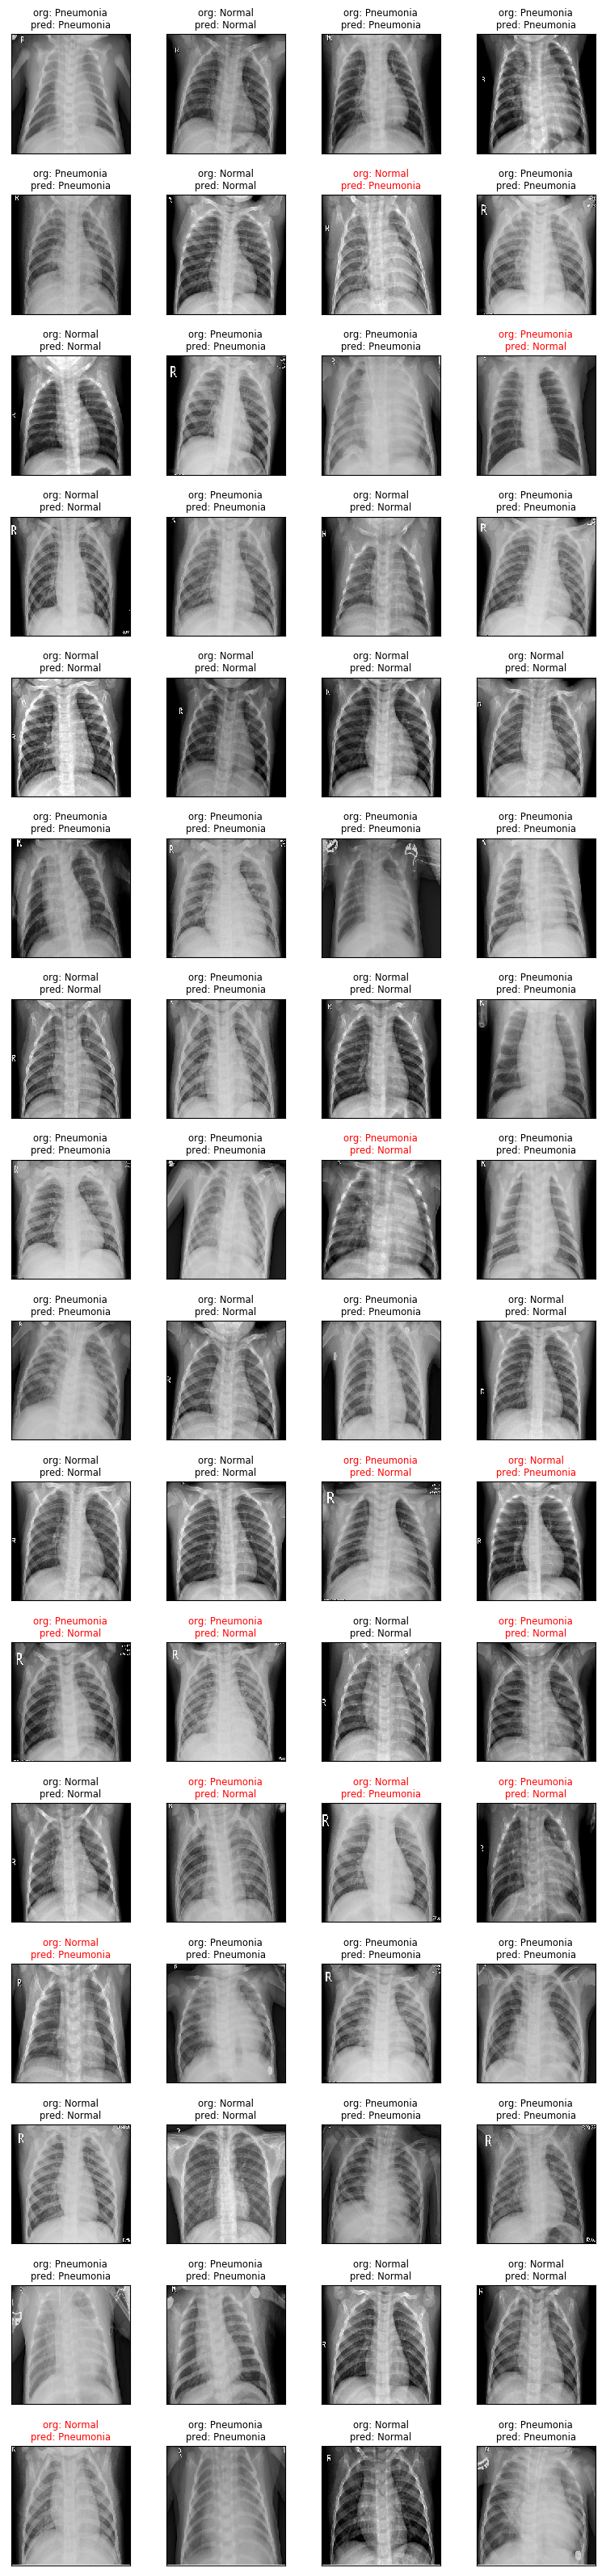

In [20]:
# figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize_col, figsize_row),
                        dpi=dpi, facecolor=facecolor, edgecolor=edgecolor,
                        subplot_kw={'xticks': [], 'yticks': []})

plt.rcParams.update({'axes.titlesize': titlesize})
plt.subplots_adjust(hspace=hspace, wspace=wspace)

for i in range(0, batch_size_t): # how many imgs will show from the mxn grid
    plt.subplot(rows, cols, i+1)
    plt.imshow(y_img_batch[i])
    plt.xticks([])
    plt.yticks([])
    if y_true_labels[i]==y_pred_labels[i]:
        plt.title(true_label_title_prefix + y_true_labels[i] + "\n" + pred_label_title_prefix + y_pred_labels[i])
    else:
        plt.title(true_label_title_prefix + y_true_labels[i] + "\n" + pred_label_title_prefix + y_pred_labels[i], color=false_prediction_label_color)
        
    fig.savefig(image_file_name, dpi=dpi)
plt.tight_layout()
plt.show()

In [22]:
figure_directory = "data/output/figures"
image_file_name = figure_directory+"/sample"

dpi=100

cols = 4
rows= 2

count = rows*cols
    
figsize_col = cols*2
figsize_row = rows*2

hspace = 0.5
wspace = 0.3

# titlesize = 'small'

true_prediction_label_color='black'
false_prediction_label_color='red'

true_label_title_prefix = "org: "
pred_label_title_prefix = "pred: "

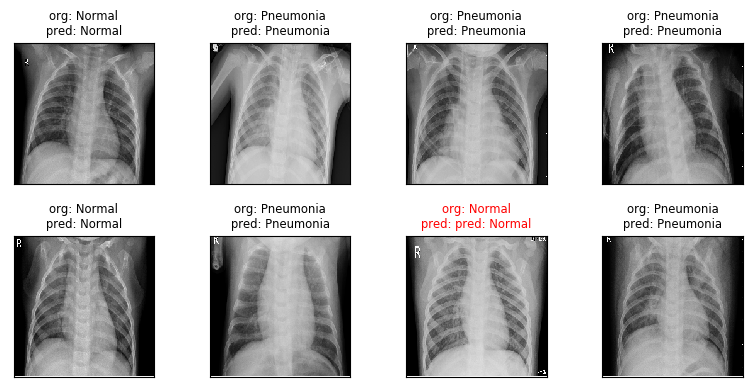

In [23]:
# figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize_col, figsize_row),
                        dpi=dpi, facecolor=facecolor, edgecolor=edgecolor,
                        subplot_kw={'xticks': [], 'yticks': []})

plt.rcParams.update({'axes.titlesize': titlesize})
plt.subplots_adjust(hspace=hspace, wspace=wspace)


batch_size_tmp = batch_size_t

m = {}

for i in range(0, count): # how many imgs will show from the mxn grid
    while num in m:
        num = random.randint(0, batch_size_tmp-1)
    
    m[num]=1
    
    plt.subplot(rows, cols, i+1)
    
    plt.imshow(y_img_batch[num])
    
    plt.xticks([])
    plt.yticks([])
    
    if y_true_labels[i]==y_pred_labels[i]:
        plt.title(true_label_title_prefix + y_true_labels[num] + "\n" + pred_label_title_prefix + y_pred_labels[num])
    else:
        plt.title(true_label_title_prefix + y_true_labels[num] + "\npred: " + pred_label_title_prefix + y_pred_labels[num], color=false_prediction_label_color)
        
    fig.savefig(image_file_name, dpi=dpi)

plt.tight_layout()
plt.show()